## Sentiment Analysis of reviews using classification algorithms

Data - [Sentiment Labelled Sentences Data Set](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences)

Contains sentence reviews for amazon, yelp and imdb. Below notebook uses the amazon dataset. 
For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews. 

Score is either 1 (for positive) or 0 (for negative) for each sentence.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk 
import string
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import sys
import textblob as tb
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.corpus import wordnet

In [2]:
#Read from file and split sentence and the sentiment category (seperated by tab space)

data=[]
file = open("amazon_cells_labelled.txt", 'r')
for line in file:
    line=line.rstrip("\n").split("\t")
    data.append(line)


In [3]:
#Store data in dataframe, remove punctuation and convert sentences into tokens

data=pd.DataFrame(data, columns=['sentence', 'sentiment'])
punkt = lambda l1,l2: sum([1 for x in l1 if x in l2])
#Count number of punctuation per sentence
data['punkt']=data['sentence'].apply(lambda x: punkt(x, set(string.punctuation)))
#Remove punctuation
data['sentence']=[sen.translate(str.maketrans("","",string.punctuation)) for sen in data['sentence']]
#Convert each sentence to a list of words/tokens
data['tokens']=data['sentence'].map(lambda sen:nltk.tokenize.word_tokenize(sen))
data['tokens'][:5]

0    [So, there, is, no, way, for, me, to, plug, it...
1                       [Good, case, Excellent, value]
2                           [Great, for, the, jawbone]
3    [Tied, to, charger, for, conversations, lastin...
4                                [The, mic, is, great]
Name: tokens, dtype: object

In [4]:
#Function to remove english stopwords (like a, an, the) as well as frequent words in the dataset (here, phone)
def cleanup(word, stop=['i', 'the', 'a', 'it', 'of','to', 'for']):
    stopw=stopwords.words('english')
    stopw.extend(stop)
    for token in word:
        if token.lower() in stopw:
            word.remove(token)
    return word


In [6]:
data['tokens']=data['tokens'].map(lambda x:cleanup(x))
data['tokens'][:5]

0       [no, way, plug, in, US, unless, go, converter]
1                       [Good, case, Excellent, value]
2                                     [Great, jawbone]
3    [Tied, charger, conversations, lasting, 45, mi...
4                                         [mic, great]
Name: tokens, dtype: object

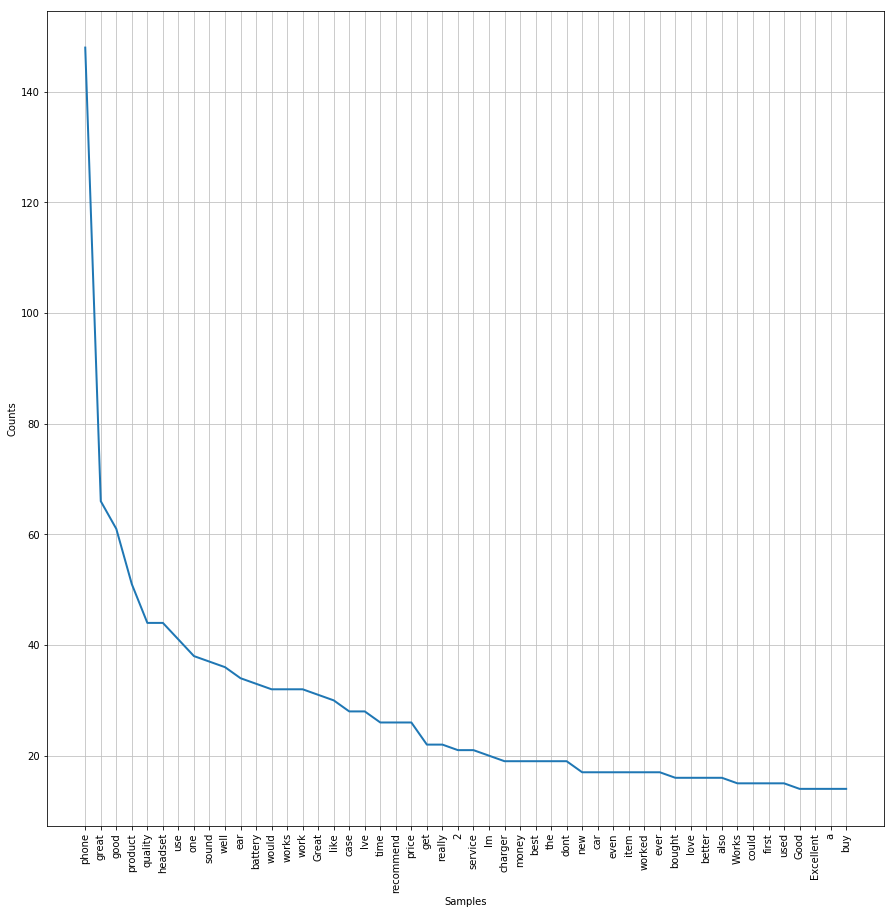

In [7]:
#Plot frequency of word occurence across the dataset (minus stopwords)
freq = nltk.FreqDist([token for word in data['tokens'] for token in word])
plt.figure(figsize=(15,15))
freq.plot(50, cumulative=False )

In [8]:
#Used to stem and lemmatize the word 
#Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach.
#Lemmatization is a more effective option because it converts the word into its root word
#rather than just stripping the suffices. 
stemmer = PorterStemmer()

lemmatizer = WordNetLemmatizer()

temp=[]
tokens=[]
for words in data['tokens']:
    temp=[]
    for word in words:
        word=lemmatizer.lemmatize(word)
        word=stemmer.stem(word)
        #word=tb.TextBlob(word)
        #word=str(word.correct())
        #Above lines used to correct spelling but takes considerable time
        temp.append(word)
    print(words)
    tokens.append(temp)
data['tokens']=tokens

['no', 'way', 'plug', 'in', 'US', 'unless', 'go', 'converter']
['Good', 'case', 'Excellent', 'value']
['Great', 'jawbone']
['Tied', 'charger', 'conversations', 'lasting', '45', 'minutesMAJOR', 'PROBLEMS']
['mic', 'great']
['jiggle', 'plug', 'get', 'line', 'right', 'get', 'decent', 'volume']
['several', 'dozen', 'several', 'hundred', 'contacts', 'imagine', 'fun', 'sending', 'one', 'one']
['Razr', 'owneryou', 'must']
['Needless', 'say', 'wasted', 'money']
['waste', 'money', 'time']
['sound', 'quality', 'great']
['impressed', 'going', 'original', 'battery', 'extended', 'battery']
['two', 'seperated', 'mere', '5', 'ft', 'started', 'notice', 'excessive', 'static', 'garbled', 'sound', 'headset']
['good', 'quality', 'though']
['design', 'odd', 'ear', 'clip', 'very', 'comfortable']
['Highly', 'recommend', 'one', 'blue', 'tooth', 'phone']
['advise', 'EVERYONE', 'FOOLED']
['Far', 'Good']
['Works', 'great']
['clicks', 'place', 'way', 'makes', 'wonder', 'long', 'mechanism', 'would', 'last']
['went

['Ive', 'bluetoooth', 'headset', 'time', 'still', 'comfortable', 'way', 'fits', 'ear']
['sound', 'quality', 'good', 'functionality', 'awesome']
['phone', 'thorn', 'side', 'really', 'abhor']
['recently', 'problems', 'could', 'stay', 'connected', '10', 'minutes', 'disconnected']
['Incredible']
['Design', 'Flaw']
['Great', 'phone']
['Waste', '13', 'bucks']
['check', 'voice', 'mail', 'night', 'keypad', 'backlight', 'turns', 'seconds', 'first', 'message', 'Im', 'lost']
['replacement', 'died', 'weeks']
['ring', 'toneOverall', 'good', 'phone', 'buy']
['Lately', 'extremely', 'nice', 'helpful', 'phone']
['problems', 'wit', 'hit', 'dropping', 'signal']
['impressed']
['Light', 'weight', 'hardly', 'notice']
['Youll', 'love', 'thin']
['Bad', 'Choice']
['pleather', 'case', 'doesnt', 'fit']
['useless', 'phone', 'simply', 'deaf']
['color', 'even', 'prettier', 'thought', 'would', 'graphics', 'incredibly', 'sharp']
['I', 'think', 'good', 'investment']
['makes', 'strange', 'ticking', 'noises', 'ends', 'c

['pleased', 'headset']
['dont', 'waste', 'money', 'time']
['especially', 'love', 'long', 'battery', 'life']
['stupid', 'keep', 'buying', 'new', 'chargers', 'car', 'chargers', 'cradles', 'headphones', 'car', 'kits', 'every', 'time', 'new', 'phone', 'comes']
['Works', 'great']
['Plantronics', 'Bluetooth', 'Excelent', 'Buy']
['came', 'Verizon', 'cingulair', 'nicer', 'cell', 'phones', 'first', 'thing', 'noticed', 'really', 'bad', 'service']
['Ill', 'looking', 'new', 'earpiece']
['highly', 'recommend', 'device', 'everyone']
['Jawbone', 'Era', 'awesome']
['received', 'WHITE', 'colored', 'battery', 'goes', 'DEAD', 'couple', 'hoursTHe', 'original', 'used', 'last', 'week', 'still', 'lasts', 'longer', 'thereplacement']
['year', 'battery', 'went', 'completely', 'dead', 'headset']
['used', 'several', 'phone', 'two', 'years', 'one', 'best']
['Awesome', 'New', 'Look', 'Fall', '2000']
['first', 'phone', 'Ive', 'been', 'cheaply', 'made']
['Att', 'clear', 'sound', 'distorted', 'to', 'yell', 'talk']
['p

['Muddy', 'low', 'quality', 'sound', 'casing', 'around', 'wires', 'insert', 'poorly', 'super', 'glued', 'slid']
['Please', 'dont', 'waste', 'money']
['Im', 'quite', 'satisfied', 'purchase']
['looking', 'good', 'quality', 'Motorola', 'Headset', 'keep', 'looking', 'isnt']
['Yet', 'Plantronincs', 'continues', 'use', 'flawed', 'charger', 'design']
['Disapointing', 'Results']
['Cumbersome', 'design']
['Great', 'new', 'packaged', 'nice', 'works', 'good', 'problems', 'came', 'less', 'time', 'expected']
['Great', 'Product']
['PIECE', 'CRAP']
['experience', 'terrible', 'fourth', 'bluetooth', 'headset', 'was', 'much', 'comfortable', 'last', 'Jabra', 'HATED']
['fixes', 'problems']
['Worst', 'ever']
['happy']
['Ive', 'trouble', 'accessing', 'Internet', 'downloading', 'ringtones', 'performing', 'functions']
['barely', 'ever', 'hear', 'am', 'constantly', 'saying']
['battery', 'life', 'highly', 'unacceptable']
['company', 'joke']
['everything', 'description', 'said', 'would']
['Due', 'happening', 'ev

['Think', 'you', 'plan', 'oneThis', 'sure', 'last', 'MOTO', 'phone']
['span', 'hour', 'two', 'people', 'exclaim', 'Whoa', 'the', 'new', 'phone', 'TV']
['always', 'used', 'corded', 'headsets', 'freedom', 'wireless', 'helpful']
['case', 'passed', 'one', 'year', 'mark', 'shows', 'signs', 'wear', '100', 'functional']
['leather', 'nice', 'soft', 'fit', 'tight', 'cut', 'the', 'face', 'good', 'shape']
['everything', 'need', 'couldnt', 'ask']
['receiving', 'using', 'product', '2', 'days', 'broke']
['product', 'great', 'makes', 'working', 'lot', 'easier', 'go', 'copier', 'waiting', 'hold', 'something']
['None', 'three', 'sizes', 'sent', 'headset', 'would', 'stay', 'ears']
['TMobile', 'best', 'customer', 'service', 'anywhere']
['Arrived', 'quickly', 'much', 'less', 'expensive', 'others', 'sold']
['tried', '2', 'units', 'failed', 'within', '2', 'months', 'Pros']
['Provides', 'good', 'protection', 'looks', 'classy']
['Krussel', 'Always', 'good']
['tracfonewebsite', 'user', 'friendly', 'makes', 'ea

['great', 'would', 'really', 'recommend']
['Makes', 'easier', 'keep', 'bluetooth', 'Im', 'wearing']
['said', 'abovePRETTY', 'USELESS']
['Never', 'got']
['pair', 'headphones', 'worst', 'ever', 'soundwise']
['drain', 'weak', 'snap']
['charge', 'Cingular', 'ATT', '8525', 'phone']
['get', 'extra', 'minutes', 'can', 'carry', 'call', 'get', 'cut']
['However', 'year', 'fliptop', 'started', 'get', 'loose', 'wobbly', 'eventually', 'screen', 'went', 'black', 'couldnt', 'receive', 'place', 'calls']
['kept', 'catching', 'cable', 'seat', 'pull', 'phone', 'to', 'turn', 'off']
['headset', 'fulfills', 'requirements', 'happy', 'purchase']
['Logitech', 'Bluetooth', 'Headset', '10']
['like', 'fact', 'rests', 'lightly', 'ear', 'rather', 'inside']
['lot', 'websites', 'rating', 'good', 'phone', 'I']
['tried', 'cables', 'computer', 'iPod', 'works', 'fine']
['mic', 'joke', 'volume', 'quite', 'low']
['Im', 'returning']
['maintain', 'connection', 'computer', 'on', 'lap']
['easy', 'turn', 'the', 'car', 'the', 'v

In [9]:
#Function to count the number of words in upper case. Anger is usually expressed in upper case.
def count(tokens):
    upper=[]
    for wordlist in tokens:
        count=0
        for word in wordlist:
            if word.isupper():
                count=count+1
        upper.append(count)
    return upper
data['upper'] = count(data['tokens'])
data.head()

,sentence,sentiment,punkt,tokens,upper
0,So there is no way for me to plug it in here i...,0,1,"[no, way, plug, in, US, unless, go, convert]",1
1,Good case Excellent value,1,2,"[good, case, excel, valu]",0
2,Great for the jawbone,1,1,"[great, jawbon]",0
3,Tied to charger for conversations lasting more...,0,3,"[tie, charger, convers, last, 45, minutesmajor...",0
4,The mic is great,1,1,"[mic, great]",0


In [10]:
#Convert positive words occuring in the dataset into 'good' and negative words into 'bad' 
#Using synonyms of commonly occuring positive/negative words
synonyms = []
antonyms = []
 
for syn in wordnet.synsets("good"):
    for l in syn.lemmas():
        synonyms.append(l.name().lower())
for syn in wordnet.synsets("better"):
    for l in syn.lemmas():
        synonyms.append(l.name().lower())
for syn in wordnet.synsets("best"):
    for l in syn.lemmas():
        synonyms.append(l.name())
for syn in wordnet.synsets("great"):
    for l in syn.lemmas():
        synonyms.append(l.name().lower())
for syn in wordnet.synsets("happy"):
    for l in syn.lemmas():
        synonyms.append(l.name().lower())
for syn in wordnet.synsets("wonderful"):
    for l in syn.lemmas():
        synonyms.append(l.name())
for syn in wordnet.synsets("excellent"):
    for l in syn.lemmas():
        synonyms.append(l.name())
for syn in wordnet.synsets("love"):
    for l in syn.lemmas():
        synonyms.append(l.name())
for syn in wordnet.synsets("nice"):
    for l in syn.lemmas():
        synonyms.append(l.name())
        
            
positive=set(synonyms)
positive.add('excel')

synonyms.clear()
for syn in wordnet.synsets("bad"):
    for l in syn.lemmas():
        synonyms.append(l.name().lower())
for syn in wordnet.synsets("worst"):
    for l in syn.lemmas():
        synonyms.append(l.name().lower())
for syn in wordnet.synsets("hate"):
    for l in syn.lemmas():
        synonyms.append(l.name().lower())
for syn in wordnet.synsets("dislike"):
    for l in syn.lemmas():
        synonyms.append(l.name().lower())
for syn in wordnet.synsets("mislead"):
    for l in syn.lemmas():
        synonyms.append(l.name().lower())
for syn in wordnet.synsets("horrible"):
    for l in syn.lemmas():
        synonyms.append(l.name())
for syn in wordnet.synsets("disappoint"):
    for l in syn.lemmas():
        synonyms.append(l.name())
for syn in wordnet.synsets("problem"):
    for l in syn.lemmas():
        synonyms.append(l.name())
for syn in wordnet.synsets("poor"):
    for l in syn.lemmas():
        synonyms.append(l.name())
for syn in wordnet.synsets("drawback"):
    for l in syn.lemmas():
        synonyms.append(l.name())
for syn in wordnet.synsets("waste"):
    for l in syn.lemmas():
        synonyms.append(l.name())
negative=set(synonyms)
negative.add('wast')

In [11]:
wl=[]
for wordlist in data['tokens']:
    for word in wordlist:
        if word.lower() in positive:
            wordlist=[w.replace(word, 'good') for w in wordlist]
        if word.lower() in negative:
            wordlist=[w.replace(word, 'bad') for w in wordlist]
        #wordlist=[w.replace(word,str(tb.TextBlob.correct(tb.TextBlob(word)))) for w in wordlist]
    wl.append(wordlist)
    print(wordlist)
data['tokens']=wl
data['tokens'].head()


['no', 'way', 'plug', 'in', 'US', 'unless', 'go', 'convert']
['good', 'case', 'good', 'valu']
['good', 'jawbon']
['tie', 'charger', 'convers', 'last', '45', 'minutesmajor', 'bad']
['mic', 'good']
['jiggl', 'plug', 'get', 'line', 'good', 'get', 'good', 'volum']
['sever', 'dozen', 'sever', 'hundr', 'contact', 'imagin', 'fun', 'send', 'one', 'one']
['razr', 'ownery', 'must']
['needless', 'say', 'bad', 'money']
['bad', 'money', 'time']
['good', 'qualiti', 'good']
['impress', 'go', 'origin', 'batteri', 'extend', 'batteri']
['two', 'seper', 'mere', '5', 'ft', 'start', 'notic', 'excess', 'static', 'garbl', 'good', 'headset']
['good', 'qualiti', 'though']
['design', 'odd', 'ear', 'clip', 'veri', 'comfort']
['highli', 'recommend', 'one', 'blue', 'tooth', 'phone']
['advis', 'everyon', 'fool']
['far', 'good']
['work', 'good']
['click', 'place', 'way', 'make', 'wonder', 'long', 'mechan', 'would', 'last']
['went', 'motorola', 'websit', 'follow', 'direct', 'could', 'get', 'pair']
['bought', 'use', '

['good', 'good']
['look', 'good', 'pictur', 'case', 'huge', 'bad']
['much', 'le', 'jawbon', 'go', 'replac']
['setup', 'went', 'smoothli']
['extrem', 'slow', 'take', 'forev', 'anyth']
['must', 'studi', 'anyon', 'interest', 'bad', 'sin', 'industri', 'design']
['first', 'thing', 'happen', 'track']
['good', 'made', 'easi', 'access', 'phone', 'handi', 'detach', 'belt', 'clip']
['to', 'continu', 'pair', 'period', 'sinc', 'somehow', 'kept', 'drop']
['cant', 'upload', 'rington', 'third', 'parti']
['bluetooth', 'work', 'phone', 'lock', 'screen', 'flash', 'it', 'make', 'call', 'randomli', 'pocket', 'lock']
['truli', 'aw']
['work', 'fine', 'motorola', '325', 'cellphon', 'lot', 'good', 'wornout', 'batteri']
['volum', 'ringer', 'real', 'good', 'choic', 'loud']
['none', 'tone', 'accept']
['camera', 'color', 'balanc', 'aw']
['product', 'clearli', 'readi', 'prime', 'time', 'dont', 'care', 'cool', 'look', 'cant', 'tell', 'call', 'come', 'worthless']
['good', 'rington', 'so', 'upbeat']
['chines', 'forge

['hear', 'Im', 'drive', 'car', 'usual', 'dont', 'even', 'put', 'loudest', 'set']
['seller', 'ship', 'quickli', 'much', 'cheaper', 'competitor']
['good', 'show', 'samsung']
['bought', '10', 'save', 'alot', 'money']
['alway', 'cut', 'make', 'beep', 'beep', 'beep', 'good', 'say', 'signal', 'fail']
['couldnt', 'figur']
['phone', 'good', 'OK', 'good', 'OK', 'wife', 'phone', 'almost', 'total', 'unintellig', 'couldnt', 'understand', 'word', 'said']
['to', 'take', 'batteri', 'phone', 'put', 'back', 'togeth', 'restart']
['manag', 'bend', 'leaf', 'spring', 'back', 'place', 'metal', 'enough', 'stress', 'good', 'next', 'drop']
['leopard', 'print', 'wonder', 'bad']
['work']
['saggi', 'floppi', 'piec', 'junk']
['much', 'good', 'hard', 'plastic', 'case']
['also', 'new', 'bad']
['happi', 'far']
['cool', 'phone']
['work', 'good']
['motorola', 'final', 'got', 'voic', 'qualiti', 'bluetooth', 'headset', 'good']
['loo', 'connect', 'phone', 'even', 'within', 'coupl', 'foot', 'two']
['good', 'would', 'realli

0         [no, way, plug, in, US, unless, go, convert]
1                             [good, case, good, valu]
2                                       [good, jawbon]
3    [tie, charger, convers, last, 45, minutesmajor...
4                                          [mic, good]
Name: tokens, dtype: object

In [12]:
#List frequently occuring words in the daaset that are not 'good' or 'bad' and remove them
stop=list(pd.Series((' '.join(x for wordlist in data['tokens'] for x in wordlist)).split()).value_counts()[:10].index)
if 'good' in map(str.lower, stop):
    stop.remove('good')
if 'bad' in map(str.lower, stop):
    stop.remove('bad')
data['tokens']=data['tokens'].map(lambda x:cleanup(x, stop))

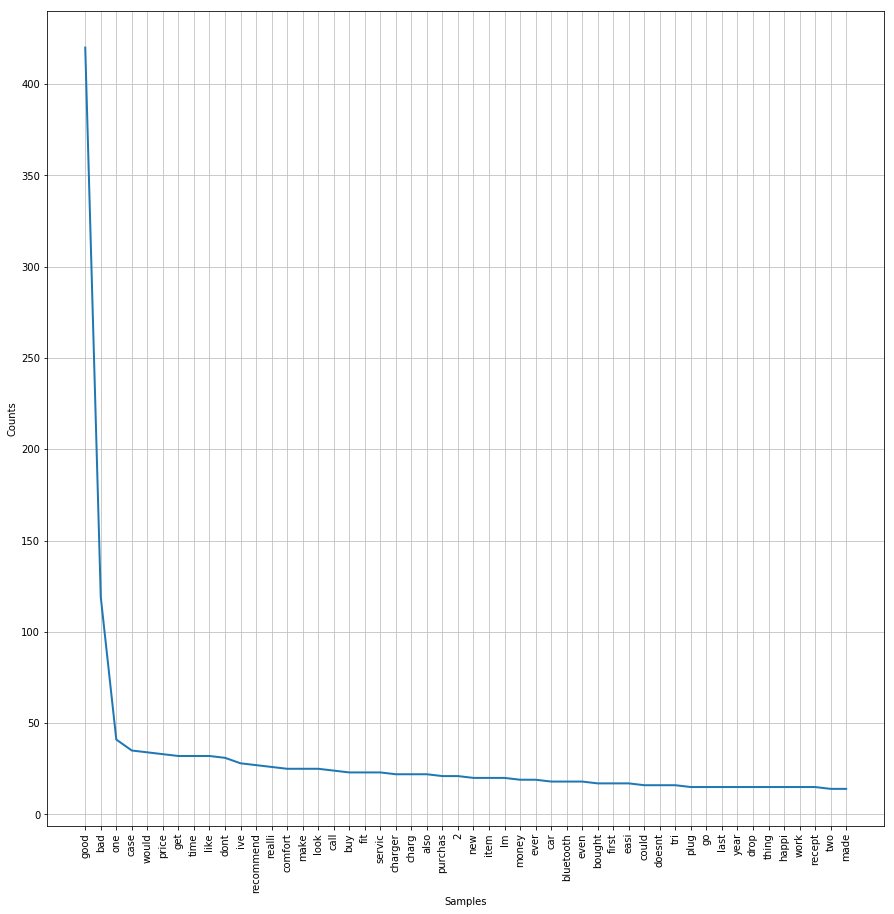

In [13]:
freq = nltk.FreqDist([token for word in data['tokens'] for token in word])
plt.figure(figsize=(15,15))
freq.plot(50, cumulative=False )

In [14]:
#Columns for count of the number of occurences of 'good' and 'bad'
data['goodfreq']=data['tokens'].apply(lambda x:x.count('good'))
data['badfreq']=data['tokens'].apply(lambda x:x.count('bad'))
data['len']=data['sentence'].apply(lambda x:len(x.split()))
data.head()

,sentence,sentiment,punkt,tokens,upper,goodfreq,badfreq,len
0,So there is no way for me to plug it in here i...,0,1,"[way, plug, US, unless, go, convert]",1,0,0,21
1,Good case Excellent value,1,2,"[good, case, good, valu]",0,2,0,4
2,Great for the jawbone,1,1,"[good, jawbon]",0,1,0,4
3,Tied to charger for conversations lasting more...,0,3,"[tie, charger, convers, last, 45, minutesmajor...",0,0,1,11
4,The mic is great,1,1,"[mic, good]",0,1,0,4


In [15]:
#Split data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(data[['upper','goodfreq','badfreq', 'len', 'punkt']], data['sentiment'], test_size=0.40, random_state=42)

In [16]:
X_train.head()

,upper,goodfreq,badfreq,len,punkt
24,0,0,1,14,1
467,0,0,1,4,1
539,0,0,0,10,1
531,0,0,0,6,1
618,0,0,0,20,2


### __Comparing various classifiers__


 -  [__Naive Bayes classifer__](http://scikit-learn.org/stable/modules/naive_bayes.html)

In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(X_train, y_train)
y_pred=model.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (len(y_test),(y_test != y_pred).sum()))
accuracy=(((y_test == y_pred).sum())/len(y_test))*100
print("Accuracy %f" %accuracy)

Number of mislabeled points out of a total 400 points : 127
Accuracy 68.250000


 - __Logistic Regression__

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


model1 = LogisticRegression()
model1 = model1.fit(X_train, y_train)

val=model1.score(X_test, y_test)
print("Accuracy %f" %(val*100))

Accuracy 72.750000


 - [__SVM__](http://scikit-learn.org/stable/modules/svm.html#classification)

In [19]:
from sklearn import svm
model2= svm.SVC()
model2.fit(X_train, y_train)
Y_pred2=model2.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (len(y_test),(y_test != Y_pred2).sum()))
accuracy2=(((y_test == Y_pred2).sum())/len(y_test))*100
print("Accuracy %f" %accuracy2)

Number of mislabeled points out of a total 400 points : 127
Accuracy 68.250000


 - [__Random Forest Classifier__](http://scikit-learn.org/stable/modules/ensemble.html)


In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)
pred=clf.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (len(y_test),(y_test != pred).sum()))
accuracy3=(((y_test == pred).sum())/len(y_test))*100
print("Accuracy %f" %accuracy3)

Number of mislabeled points out of a total 400 points : 148
Accuracy 63.000000


### __REFERENCES__

 -  [NLP Tutorial using Python NLTK](https://dzone.com/articles/nlp-tutorial-using-python-nltk-simple-examples)
 -  [Ultimate guide to deal with Text Data (using Python) – for Data Scientists & Engineers](https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/)
 -  [Choosing the right estimator](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
